PROCESS

In [1]:
# Install needed packages
install.packages("tidyverse", dependencies = TRUE)
install.packages("lubridate")
install.packages("geosphere")


Warning message in install.packages("tidyverse", dependencies = TRUE):
“installation of package ‘tidyverse’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
# Load the packages
library(readr)
library(dplyr)
library(purrr)
library(tidyr)
library(lubridate)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Set the working directory to the location of the downloaded data
setwd("/home/ladipo/Desktop/Data Analytic/DataSets/Cyclic_Data")

In [3]:
# List all CSV files in the working directory set above
files <- list.files(pattern = "*.csv")

In [4]:
# Read each CSV file and store them in a list for efficient CSV reading
data_list <- lapply(files, read_csv)

Rows: 426590 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 144873 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 223164 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [5]:
# Combine the list of data frames into a single data frame using bind_rows
combined_data <- bind_rows(data_list)

In [6]:
head(combined_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NA,NA,NA,NA,41.80,-87.60,41.79,-87.60,member
34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NA,NA,NA,NA,41.87,-87.65,41.93,-87.68,member
5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NA,NA,NA,NA,41.93,-87.66,41.93,-87.66,member
40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NA,NA,NA,NA,41.92,-87.65,41.91,-87.65,member
77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NA,NA,NA,NA,41.91,-87.65,41.91,-87.63,member
8D6A2328E19DC168,electric_bike,2023-04-19 12:17:34,2023-04-19 12:21:38,NA,NA,NA,NA,41.91,-87.63,41.92,-87.65,member


In [ ]:
# View the combined data
View(combined_data)

In [7]:
# Structure of the data
str(combined_data)

spc_tbl_ [5,750,177 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5750177] "8FE8F7D9C10E88C7" "34E4ED3ADF1D821B" "5296BF07A2F77CB5" "40759916B76D5D52" ...
 $ rideable_type     : chr [1:5750177] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5750177], format: "2023-04-02 08:37:28" "2023-04-19 11:29:02" ...
 $ ended_at          : POSIXct[1:5750177], format: "2023-04-02 08:41:37" "2023-04-19 11:52:12" ...
 $ start_station_name: chr [1:5750177] NA NA NA NA ...
 $ start_station_id  : chr [1:5750177] NA NA NA NA ...
 $ end_station_name  : chr [1:5750177] NA NA NA NA ...
 $ end_station_id    : chr [1:5750177] NA NA NA NA ...
 $ start_lat         : num [1:5750177] 41.8 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:5750177] -87.6 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num [1:5750177] 41.8 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num [1:5750177] -87.6 -87.7 -87.7 -87.7 -87.6 ...
 $ membe

# Print the original data frame
print("Original Data Frame:")
print(combined_data)

# Identify duplicate rows
duplicate_rows <- combined_data[duplicated(combined_data), ]
print("Duplicate Rows:")
print(duplicate_rows)

# Create a copy of the original data frame
combined_data <- combined_data

# Remove duplicate rows from the copy
combined_data <- combined_data[!duplicated(combined_data), ]

print("Data Frame after Removing Duplicates:")
print(combined_data)


# Print the original data frame
print("Original Data Frame:")
print(combined_data)

# Identify missing values
missing_values <- is.na(combined_data)
print("Missing Values in Data Frame:")
missing_values

# Create a copy of the original data frame
combined_data <- combined_data

# Fill missing values in the copy
# For numeric columns, fill with mean
combined_data$started_at[is.na(combined_data$start_station_id)] <- mean(combined_data$start_station_id, na.rm = TRUE)

# For character columns, fill with "Unknown"
combined_data$start_station_name[is.na(combined_data$start_station_name)] <- "Unknown"

# For character columns, fill with "Unknown"
combined_data$start_station_id[is.na(combined_data$start_station_id)] <- "Unknown"

# For numeric columns, fill with mean
# combined_data$end_station_id[is.na(combined_data$end_station_id)] <- mean(combined_data$end_station_id, na.rm = TRUE)

# For character columns, fill with "Unknown"
combined_data$end_station_name[is.na(combined_data$end_station_name)] <- "Unknown"

# For character columns, fill with "Unknown"
combined_data$end_station_id[is.na(combined_data$end_station_id)] <- "Unknown"

print("Data Frame after Filling Missing Values:")
print(combined_data)

In [8]:
# Convert to datetime using lubridate
combined_data$started_at <- ymd_hms(combined_data$started_at)
combined_data$ended_at <- ymd_hms(combined_data$ended_at)

In [9]:
# Calculate the ride length time
combined_data$time_diff <- as.duration(interval(combined_data$started_at, combined_data$ended_at))

In [10]:
# Convert the duration to a more readable format, if necessary
combined_data$ride_length <- as.numeric(combined_data$time_diff, units = "mins")

In [11]:
# Extract the day of the week as a number (1 = Sunday, 2 = Monday, ...)
combined_data$day_of_week_num <- wday(combined_data$started_at)

In [12]:
# Extract the day of the week as a label (Sunday, Monday, ...)
combined_data$day_of_week_label <- wday(combined_data$started_at, label = TRUE)

In [13]:
# Extract the month number and name
combined_data$month_number <- month(combined_data$started_at)
combined_data$month_name <- month(combined_data$started_at, label = TRUE, abbr = FALSE)

In [14]:
library(geosphere)

# Calculate distance in meters
combined_data$distance <- distHaversine(p1 = cbind(combined_data$start_lng, combined_data$start_lat), 
                              p2 = cbind(combined_data$end_lng, combined_data$end_lat))

head(combined_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,ride_length,day_of_week_num,day_of_week_label,month_number,month_name,distance
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<Duration>,<dbl>,<dbl>,<ord>,<dbl>,<ord>,<dbl>
8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NA,NA,NA,NA,41.80,-87.60,41.79,-87.60,member,249s (~4.15 minutes),4.150000,1,Sun,4,April,1113.195
34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NA,NA,NA,NA,41.87,-87.65,41.93,-87.68,member,1390s (~23.17 minutes),23.166667,4,Wed,4,April,7126.708
5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NA,NA,NA,NA,41.93,-87.66,41.93,-87.66,member,120s (~2 minutes),2.000000,4,Wed,4,April,0.000
40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NA,NA,NA,NA,41.92,-87.65,41.91,-87.65,member,219s (~3.65 minutes),3.650000,4,Wed,4,April,1113.195
77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NA,NA,NA,NA,41.91,-87.65,41.91,-87.63,member,290s (~4.83 minutes),4.833333,4,Wed,4,April,1656.868
8D6A2328E19DC168,electric_bike,2023-04-19 12:17:34,2023-04-19 12:21:38,NA,NA,NA,NA,41.91,-87.63,41.92,-87.65,member,244s (~4.07 minutes),4.066667,4,Wed,4,April,1995.992


In [15]:
# Filter out rows with NA in the 'started_at' or 'ended_at' columns
combined_data_clean <- combined_data %>%
  filter(!is.na(started_at) & !is.na(ended_at))

head(combined_data_clean)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,ride_length,day_of_week_num,day_of_week_label,month_number,month_name,distance
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<Duration>,<dbl>,<dbl>,<ord>,<dbl>,<ord>,<dbl>
8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NA,NA,NA,NA,41.80,-87.60,41.79,-87.60,member,249s (~4.15 minutes),4.150000,1,Sun,4,April,1113.195
34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NA,NA,NA,NA,41.87,-87.65,41.93,-87.68,member,1390s (~23.17 minutes),23.166667,4,Wed,4,April,7126.708
5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NA,NA,NA,NA,41.93,-87.66,41.93,-87.66,member,120s (~2 minutes),2.000000,4,Wed,4,April,0.000
40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NA,NA,NA,NA,41.92,-87.65,41.91,-87.65,member,219s (~3.65 minutes),3.650000,4,Wed,4,April,1113.195
77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NA,NA,NA,NA,41.91,-87.65,41.91,-87.63,member,290s (~4.83 minutes),4.833333,4,Wed,4,April,1656.868
8D6A2328E19DC168,electric_bike,2023-04-19 12:17:34,2023-04-19 12:21:38,NA,NA,NA,NA,41.91,-87.63,41.92,-87.65,member,244s (~4.07 minutes),4.066667,4,Wed,4,April,1995.992


In [33]:
# Export dataframe to CSV file on my computer
write.csv(combined_data_clean, file = "/home/ladipo/Desktop/Data Analytic/Coursera Training/combined_data_clean_bike_vscode.csv", row.names = FALSE)

ANALYSIS

In [16]:
# Combine grouping and summarizing of members and casual day of the week label
combined_data_clean_month <- combined_data_clean %>%
  group_by(month_name) %>%
  summarize(
    average_ride_length = ceiling(mean(ride_length)),
    count = ceiling(n()/10000)
  )

View(combined_data_clean_month)

month_name,average_ride_length,count
<ord>,<dbl>,<dbl>
January,16,15
February,16,23
March,16,31
April,18,43
May,20,61
June,20,72
July,22,77
August,23,78
September,18,67


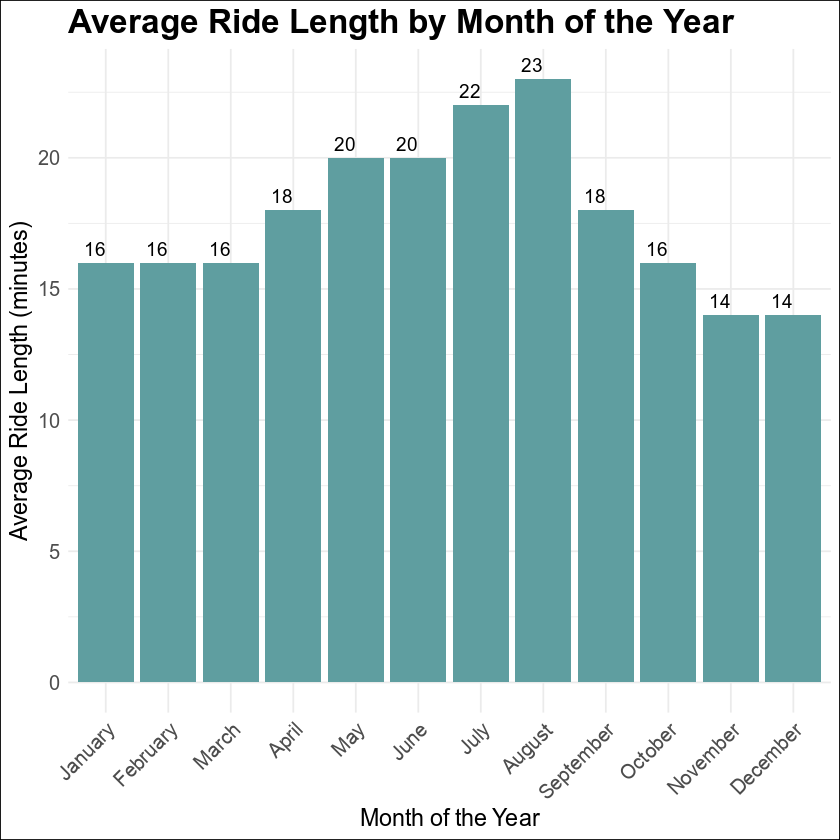

In [23]:
# Plot the average ride length with custom colors and white background
p1 <- ggplot(combined_data_clean_month, aes(x = month_name, y = average_ride_length)) +
  geom_bar(stat = "identity", fill = "#5F9EA0") +  # Turquoise
  geom_text(aes(label = average_ride_length), vjust = -0.5, size = 4, hjust = 1) +  # Add data labels
  labs(title = "Average Ride Length by Month of the Year",
       x = "Month of the Year",
       y = "Average Ride Length (minutes)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
    ) 

# Print both plots
print(p1)



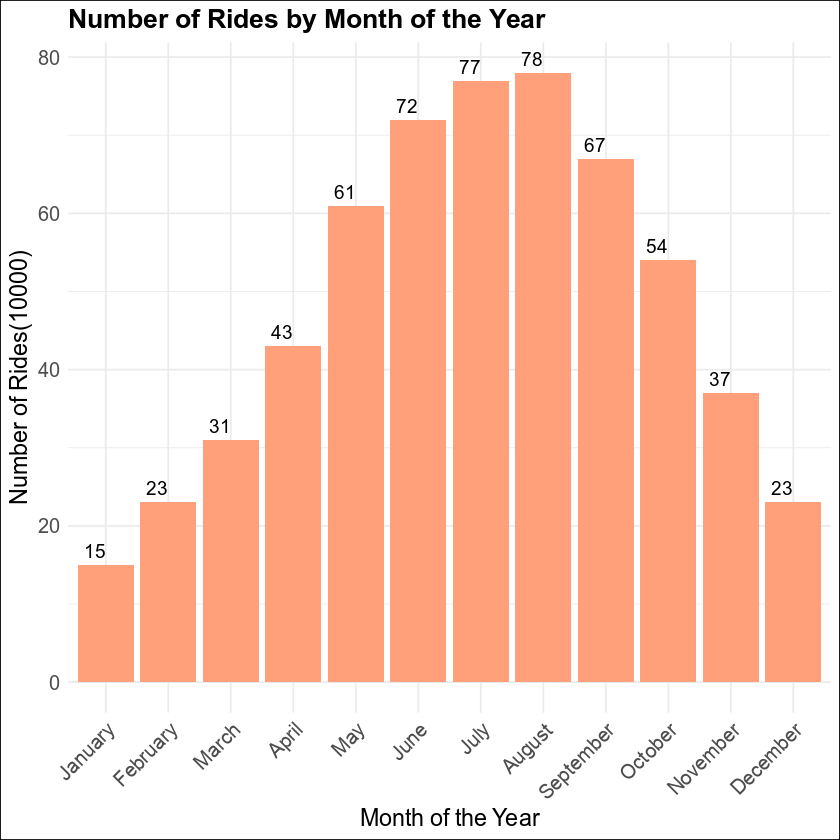

In [24]:
# Plot the number of rides with custom colors and white background
p2 <- ggplot(combined_data_clean_month, aes(x = month_name, y = count)) +
  geom_bar(stat = "identity", fill = "#FFA07A") +  # Light Salmon
  geom_text(aes(label = count), vjust = -0.5, size = 4, hjust = 1) +  # Add data labels
  labs(title = "Number of Rides by Month of the Year",
       x = "Month of the Year",
       y = "Number of Rides(10000)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
    ) 

# Print both plots
print(p2)

In [25]:
# Combine grouping and summarizing of members and casual day of the week label
combined_data_clean_day <- combined_data_clean %>%
  group_by(day_of_week_label) %>%
  summarize(
    mean_ride_length = ceiling(mean(ride_length)),
    count = ceiling(n()/10000)
  )

View(combined_data_clean_day)

day_of_week_label,mean_ride_length,count
<ord>,<dbl>,<dbl>
Sun,23,75
Mon,18,74
Tue,17,82
Wed,16,84
Thu,17,88
Fri,19,85
Sat,23,90


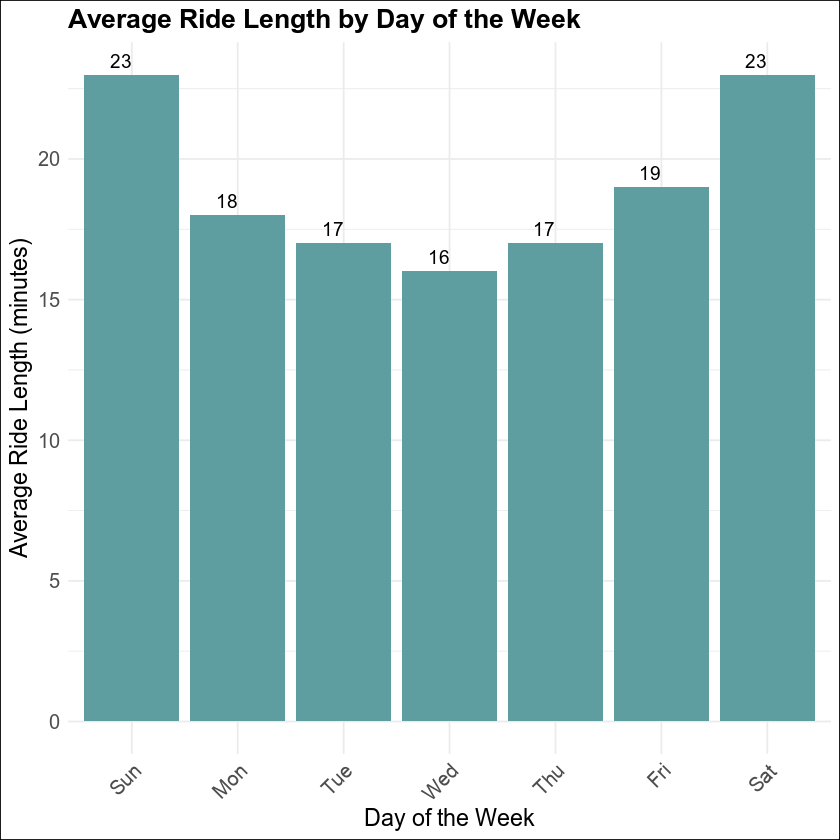

In [26]:
# Load the necessary package
library(ggplot2)

# Plot the average ride length with custom colors and white background
p1 <- ggplot(combined_data_clean_day, aes(x = day_of_week_label, y = mean_ride_length)) +
  geom_bar(stat = "identity", fill = "#5F9EA0") +  # Turquoise
  geom_text(aes(label = mean_ride_length), vjust = -0.5, size = 4, hjust = 1) +  # Add data labels
  labs(title = "Average Ride Length by Day of the Week",
       x = "Day of the Week",
       y = "Average Ride Length (minutes)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
    ) 


# Print both plots
print(p1)


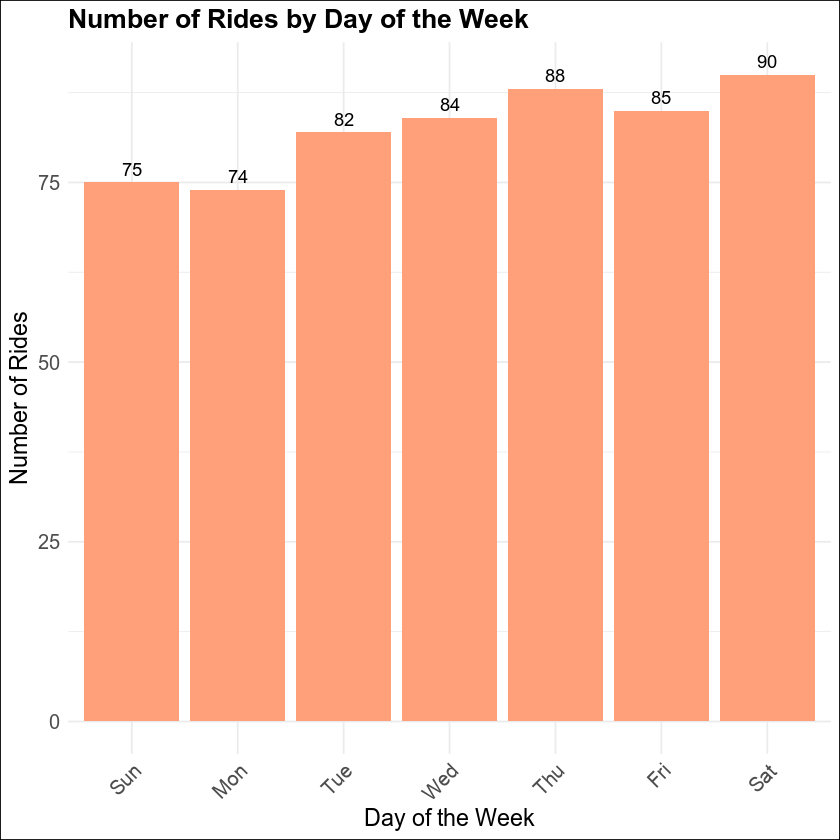

In [27]:
# Plot the number of rides with custom colors and white background
p2 <- ggplot(combined_data_clean_day, aes(x = day_of_week_label, y = count)) +
  geom_bar(stat = "identity", fill = "#FFA07A") +  # Light Salmon
  geom_text(aes(label = count), vjust = -0.5) +  # Add data labels
  labs(title = "Number of Rides by Day of the Week",
       x = "Day of the Week",
       y = "Number of Rides") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
    ) 

# Print both plots
print(p2)

In [28]:
# Group by 'day_of_week_label' and count 'member' and 'casual'

# Calculate counts and percentages
member_casual <- combined_data_clean %>%
  group_by(day_of_week_label) %>%
  summarize(
    total_member = sum(member_casual == "member"),
    total_casual = sum(member_casual == "casual"),
    percent_member = ceiling((total_member / sum(total_member + total_casual)) * 100),
    percent_casual = ceiling((total_casual / sum(total_member + total_casual)) * 100)
  )
View(member_casual)

day_of_week_label,total_member,total_casual,percent_member,percent_casual
<ord>,<int>,<int>,<dbl>,<dbl>
Sun,407528,336328,55,46
Mon,500519,236302,68,33
Tue,571565,244154,71,30
Wed,590031,247356,71,30
Thu,601874,272951,69,32
Fri,530154,312577,63,38
Sat,480379,418459,54,47


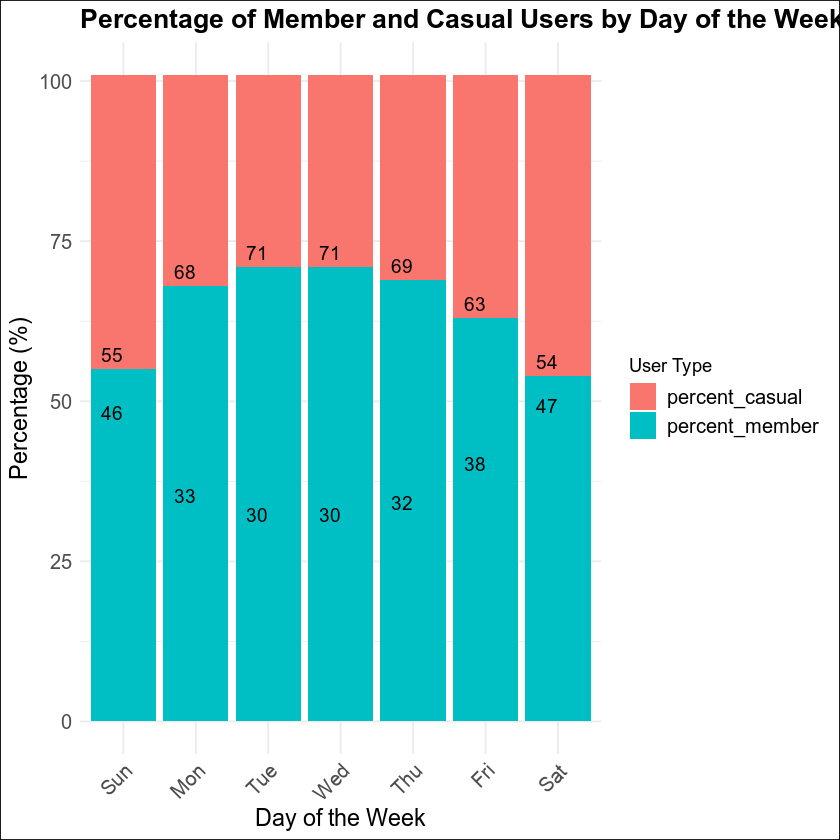

In [32]:
# Reshape data for plotting
member_casual_long <- member_casual %>%
  pivot_longer(cols = c(percent_member, percent_casual),
               names_to = "type",
               values_to = "percentage")

# Plotting the stacked bar chart
ggplot(member_casual_long, aes(x = day_of_week_label, y = percentage, fill = type)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = percentage), vjust = -0.5, size = 4, hjust = 1) +  # Add data labels
  labs(title = "Percentage of Member and Casual Users by Day of the Week",
       x = "Day of the Week",
       y = "Percentage (%)",
       fill = "User Type") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
  )

In [ ]:
# Group by 'rideable_type' and count 'member' and 'casual'
rideable_type_number <- combined_data_clean %>%
  dplyr::group_by(rideable_type) %>%
  dplyr::summarize(
    member = sum(member_casual == "member"),
    casual = sum(member_casual == "casual")
  )

View(rideable_type_number)